Random Forest Accuracy: 0.76

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       152
           1       1.00      0.00      0.00        48

    accuracy                           0.76       200
   macro avg       0.88      0.50      0.43       200
weighted avg       0.82      0.76      0.66       200

XGBoost Accuracy: 0.77

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       152
           1       0.56      0.21      0.30        48

    accuracy                           0.77       200
   macro avg       0.67      0.58      0.58       200
weighted avg       0.73      0.77      0.73       200



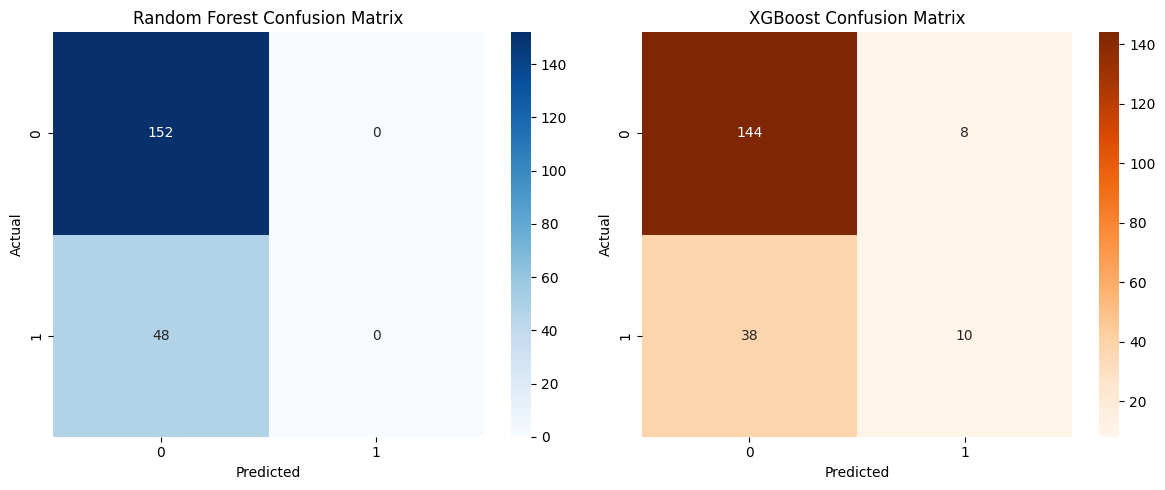

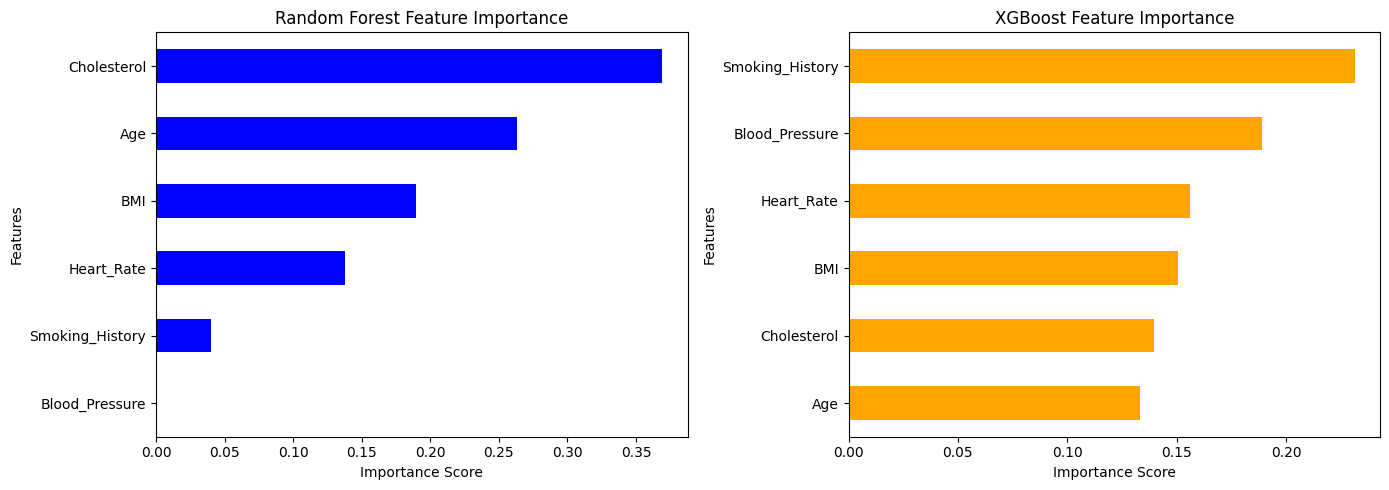

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Generate synthetic dataset
np.random.seed(42)
num_samples = 1000

data = pd.DataFrame({
    "Age": np.random.randint(20, 80, num_samples),
    "Blood_Pressure": np.random.randint(90, 180, num_samples),
    "Cholesterol": np.random.randint(100, 300, num_samples),
    "Heart_Rate": np.random.randint(60, 120, num_samples),
    "BMI": np.random.uniform(18.5, 35, num_samples),
    "Smoking_History": np.random.randint(0, 2, num_samples)
})

# Generate Disease labels with some noise
data["Disease"] = ((data["Blood_Pressure"] > 140) &
                   (data["Cholesterol"] > 250) &
                   (data["Smoking_History"] == 1)).astype(int)

random_noise = np.random.choice([0, 1], size=num_samples, p=[0.75, 0.25])
data["Disease"] = np.where(random_noise == 1, 1 - data["Disease"], data["Disease"])

# Split dataset into training sets
X = data.drop(columns=["Disease"])
y = data["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=5, max_depth=2, max_features="sqrt", random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluate Random Forest
rf_acc = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds, zero_division=1)
rf_conf_matrix = confusion_matrix(y_test, rf_preds)

# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6,
                          reg_lambda=5, reg_alpha=3, eval_metric="logloss",
                          random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_report = classification_report(y_test, xgb_preds, zero_division=1)
xgb_conf_matrix = confusion_matrix(y_test, xgb_preds)

# Print Model Performance
print("Random Forest Accuracy:", rf_acc)
print("\nRandom Forest Classification Report:\n", rf_report)

print("XGBoost Accuracy:", xgb_acc)
print("\nXGBoost Classification Report:\n", xgb_report)

# Create a figure for side-by-side confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# XGBoost Confusion Matrix
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Oranges", ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

# Show the confusion matrices
plt.tight_layout()
plt.show()

# Extract feature importance from models
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Create a figure for separate feature importance plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest Feature Importance
rf_importance.sort_values().plot(kind="barh", ax=ax[0], color="blue")
ax[0].set_title("Random Forest Feature Importance")
ax[0].set_xlabel("Importance Score")
ax[0].set_ylabel("Features")

# XGBoost Feature Importance
xgb_importance.sort_values().plot(kind="barh", ax=ax[1], color="orange")
ax[1].set_title("XGBoost Feature Importance")
ax[1].set_xlabel("Importance Score")
ax[1].set_ylabel("Features")

# Adjust layout for better readability
plt.tight_layout()
plt.show()
